In [1023]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1024]:
#Parameters
trading_window = 14

#MACD parameters
n = 9
m = 16
t = 6

#RSI parameters
period = 14

In [1025]:
dataimport=pd.read_csv('/Users/hitengoel/Machine Learning/Pair Trading (ML:TI)/data/Sensex.csv')
datacopy1 = dataimport.copy()
dataimport['Date'] = pd.to_datetime(dataimport['Date'])
curr = dataimport.columns[0]
dataimport.rename(columns={curr: 'Stocks'}, inplace=True)
dataimport.set_index('Stocks', inplace=True)




dataimport.head()

,KMB IB Equity,HCLT IB Equity,NTPC IB Equity,NEST IB Equity,BHARTI IB Equity,RELIANCE IB Equity,TCS IB Equity,ITC IB Equity,MM IB Equity,UTCEM IB Equity,...,HDFCB IB Equity,ICICIBC IB Equity,APNT IB Equity,SBIN IB Equity,TTAN IB Equity,TTMT IB Equity,IIB IB Equity,JSTL IB Equity,LT IB Equity,AXSB IB Equity
Stocks,,,,,,,,,,,,,,,,,,,,,
2011-01-03,227.88,113.63,165.04,3829.15,323.87,475.67,579.78,116.23,393.53,1086.60,...,239.05,207.93,287.49,282.09,184.12,258.52,264.80,119.17,879.84,273.52
2011-01-04,229.93,115.20,166.63,3894.70,320.22,485.78,571.88,118.30,390.10,1085.80,...,234.34,200.75,283.79,273.36,182.89,257.34,255.65,116.91,876.09,269.48
2011-01-05,223.95,117.79,165.92,3897.55,315.35,484.58,579.03,119.93,385.53,1072.35,...,230.64,194.56,286.79,269.73,182.01,253.76,248.95,114.76,857.98,262.17
2011-01-06,222.58,119.29,168.13,3842.15,318.37,489.14,587.10,119.10,384.95,1010.70,...,232.69,191.46,284.63,262.52,178.70,249.14,244.35,109.93,834.44,261.48
2011-01-07,217.28,116.28,164.08,3781.85,305.26,480.52,570.80,115.00,369.30,989.70,...,226.84,190.55,277.41,259.99,170.76,235.38,231.40,103.27,821.20,256.05


In [1026]:

daily = dataimport.pct_change()
daily=daily.dropna()
daily.head()

,KMB IB Equity,HCLT IB Equity,NTPC IB Equity,NEST IB Equity,BHARTI IB Equity,RELIANCE IB Equity,TCS IB Equity,ITC IB Equity,MM IB Equity,UTCEM IB Equity,...,HDFCB IB Equity,ICICIBC IB Equity,APNT IB Equity,SBIN IB Equity,TTAN IB Equity,TTMT IB Equity,IIB IB Equity,JSTL IB Equity,LT IB Equity,AXSB IB Equity
Stocks,,,,,,,,,,,,,,,,,,,,,
2011-01-04,0.008996,0.013817,0.009634,0.017119,-0.011270,0.021254,-0.013626,0.017810,-0.008716,-0.000736,...,-0.019703,-0.034531,-0.012870,-0.030948,-0.006680,-0.004564,-0.034554,-0.018965,-0.004262,-0.014770
2011-01-05,-0.026008,0.022483,-0.004261,0.000732,-0.015208,-0.002470,0.012503,0.013779,-0.011715,-0.012387,...,-0.015789,-0.030834,0.010571,-0.013279,-0.004812,-0.013912,-0.026208,-0.018390,-0.020671,-0.027126
2011-01-06,-0.006117,0.012735,0.013320,-0.014214,0.009577,0.009410,0.013937,-0.006921,-0.001504,-0.057491,...,0.008888,-0.015933,-0.007532,-0.026730,-0.018186,-0.018206,-0.018478,-0.042088,-0.027437,-0.002632
2011-01-07,-0.023812,-0.025233,-0.024089,-0.015694,-0.041179,-0.017623,-0.027764,-0.034425,-0.040655,-0.020778,...,-0.025141,-0.004753,-0.025366,-0.009637,-0.044432,-0.055230,-0.052998,-0.060584,-0.015867,-0.020766
2011-01-10,-0.048555,-0.001892,-0.029924,0.001044,0.000426,-0.031778,-0.011475,-0.011565,-0.012727,0.003435,...,-0.050035,-0.032170,-0.035867,-0.020039,-0.036367,-0.009474,-0.034572,-0.043672,-0.035314,-0.018785


In [1027]:
data = dataimport.transpose()
#data.head()

In [1028]:
train_data = daily.iloc[:260]  

for i in train_data.columns:
    train_data[i] = (1 + train_data[i]).cumprod() - 1

train_data=train_data.transpose()
train_data

/var/folders/94/qzww3__j7w95pdc_5q59f29c0000gn/T/ipykernel_13018/3759786872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[i] = (1 + train_data[i]).cumprod() - 1


Stocks,2011-01-04,2011-01-05,2011-01-06,2011-01-07,2011-01-10,2011-01-11,2011-01-12,2011-01-13,2011-01-14,2011-01-17,...,2011-12-20,2011-12-21,2011-12-22,2011-12-23,2011-12-26,2011-12-27,2011-12-28,2011-12-29,2011-12-30,2012-01-02
KMB IB Equity,0.008996,-0.017246,-0.023258,-0.046516,-0.092812,-0.083377,-0.069554,-0.107206,-0.126602,-0.115412,...,-0.022731,0.021371,0.016895,0.002062,0.016675,-0.005924,-0.003862,-0.020976,-0.051562,-0.075039
HCLT IB Equity,0.013817,0.036610,0.049811,0.023321,0.021385,0.044090,0.051923,0.019361,0.032650,0.045939,...,-0.135528,-0.141072,-0.145648,-0.145384,-0.146352,-0.138520,-0.139488,-0.147320,-0.145824,-0.133767
NTPC IB Equity,0.009634,0.005332,0.018723,-0.005817,-0.035567,-0.039384,-0.036355,-0.046413,-0.056774,-0.055805,...,-0.218129,-0.190620,-0.172928,-0.199709,-0.189106,-0.207525,-0.186318,-0.188076,-0.189106,-0.201466
NEST IB Equity,0.017119,0.017863,0.003395,-0.012353,-0.011321,-0.010564,-0.005576,-0.011661,-0.022838,-0.040348,...,0.071896,0.040505,0.075343,0.069180,0.079626,0.100205,0.096470,0.079757,0.089720,0.062990
BHARTI IB Equity,-0.011270,-0.026307,-0.016982,-0.057461,-0.057060,-0.056072,-0.030197,-0.037021,-0.046346,-0.032698,...,-0.101584,-0.049680,-0.066508,-0.080434,-0.040788,-0.045358,-0.044123,-0.050792,-0.045790,-0.040232
RELIANCE IB Equity,0.021254,0.018731,0.028318,0.010196,-0.021906,-0.037799,-0.022347,-0.036895,-0.050287,-0.053461,...,-0.323102,-0.291126,-0.284020,-0.291904,-0.278134,-0.285450,-0.299388,-0.323712,-0.342696,-0.329367
TCS IB Equity,-0.013626,-0.001294,0.012625,-0.015489,-0.026786,-0.051882,-0.020749,-0.030494,-0.035238,-0.018455,...,-0.022819,0.000293,-0.009107,-0.002811,0.024440,0.014833,0.008279,0.004985,0.001466,0.016127
ITC IB Equity,0.017810,0.031833,0.024692,-0.010582,-0.022025,-0.025467,-0.005678,-0.006883,-0.023488,-0.014884,...,0.144541,0.159167,0.168631,0.169492,0.174396,0.173793,0.159511,0.152628,0.154607,0.138002
MM IB Equity,-0.008716,-0.020329,-0.021803,-0.061571,-0.073514,-0.065510,-0.045740,-0.062206,-0.060986,-0.063096,...,-0.172922,-0.123574,-0.119127,-0.115188,-0.107946,-0.106040,-0.127436,-0.127640,-0.132137,-0.143826
UTCEM IB Equity,-0.000736,-0.013114,-0.069851,-0.089177,-0.086048,-0.062995,-0.069759,-0.044727,-0.061476,-0.069621,...,0.026781,0.034465,0.075465,0.084576,0.096218,0.094515,0.080434,0.062995,0.067964,0.060372


In [1029]:
from sklearn.cluster import AffinityPropagation
ap = AffinityPropagation()
ap.fit(train_data)
labels = ap.predict(train_data)

In [1030]:
groups = []
for i in range(labels.max()+1):
    arr = []
    for j in range(len(labels)):
        if labels[j] == i:
            arr.append(train_data.index[j])
    groups.append(arr)


for i in range(len(groups)):
    print("Group", i+1, ":", groups[i])

Group 1 : ['NEST IB Equity', 'BHARTI IB Equity', 'ITC IB Equity', 'HUVR IB Equity', 'APNT IB Equity', 'TTAN IB Equity']
Group 2 : ['NTPC IB Equity', 'RELIANCE IB Equity', 'WPRO IB Equity', 'INFO IB Equity', 'MSIL IB Equity', 'ICICIBC IB Equity', 'AXSB IB Equity']
Group 3 : ['TATA IB Equity', 'SBIN IB Equity', 'TTMT IB Equity', 'JSTL IB Equity', 'LT IB Equity']
Group 4 : ['KMB IB Equity', 'HCLT IB Equity', 'TCS IB Equity', 'MM IB Equity', 'UTCEM IB Equity', 'SUNP IB Equity', 'BAF IB Equity', 'HDFCB IB Equity', 'IIB IB Equity']


# Indicators

In [1031]:

datacopy1['Date'] = pd.to_datetime(datacopy1['Date'])
datacopy1.set_index('Date', inplace=True)
data = datacopy1

data.reset_index(inplace=True)
data['Date'] = data['Date'].astype(str)
stock_names = data.columns[1:]

datacopy = data.copy()

data

,Date,KMB IB Equity,HCLT IB Equity,NTPC IB Equity,NEST IB Equity,BHARTI IB Equity,RELIANCE IB Equity,TCS IB Equity,ITC IB Equity,MM IB Equity,...,HDFCB IB Equity,ICICIBC IB Equity,APNT IB Equity,SBIN IB Equity,TTAN IB Equity,TTMT IB Equity,IIB IB Equity,JSTL IB Equity,LT IB Equity,AXSB IB Equity
0,2011-01-03,227.88,113.63,165.04,3829.15,323.87,475.67,579.78,116.23,393.53,...,239.05,207.93,287.49,282.09,184.12,258.52,264.80,119.17,879.84,273.52
1,2011-01-04,229.93,115.20,166.63,3894.70,320.22,485.78,571.88,118.30,390.10,...,234.34,200.75,283.79,273.36,182.89,257.34,255.65,116.91,876.09,269.48
2,2011-01-05,223.95,117.79,165.92,3897.55,315.35,484.58,579.03,119.93,385.53,...,230.64,194.56,286.79,269.73,182.01,253.76,248.95,114.76,857.98,262.17
3,2011-01-06,222.58,119.29,168.13,3842.15,318.37,489.14,587.10,119.10,384.95,...,232.69,191.46,284.63,262.52,178.70,249.14,244.35,109.93,834.44,261.48
4,2011-01-07,217.28,116.28,164.08,3781.85,305.26,480.52,570.80,115.00,369.30,...,226.84,190.55,277.41,259.99,170.76,235.38,231.40,103.27,821.20,256.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,2022-12-26,1811.70,1031.25,165.55,19896.05,811.20,2299.89,3255.85,334.55,1236.70,...,1628.15,892.40,3057.50,596.75,2481.75,384.85,1195.20,732.55,2087.90,928.75
3126,2022-12-27,1820.50,1036.45,165.05,19779.85,814.75,2318.61,3259.05,333.05,1232.60,...,1630.65,900.65,3109.80,601.85,2503.65,394.15,1202.40,764.65,2123.75,932.55
3127,2022-12-28,1820.25,1035.35,165.70,19850.60,803.45,2318.06,3256.30,334.50,1251.95,...,1629.45,898.70,3124.00,601.20,2581.20,391.40,1214.15,761.10,2120.80,924.95
3128,2022-12-29,1818.20,1044.50,166.65,19822.10,819.45,2316.33,3269.25,335.25,1261.80,...,1640.90,906.70,3115.30,612.30,2552.70,385.90,1230.95,769.50,2110.60,935.00


In [1032]:
def MACD(price_data, short_window, long_window, signal_window, column_name):
    data = price_data
   
    data.loc[:,'EMAn'] = data[column_name].ewm(span=short_window, adjust=False).mean()
    data.loc[:,'EMAm'] = data[column_name].ewm(span=long_window, adjust=False).mean()

    for i in range(short_window):
        data.loc[i,'EMAn'] = None
    for i in range(long_window):
        data.loc[i,'EMAm'] = None
    
    data['MACD'] = data['EMAn'] - data['EMAm']
    data['Signal Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

    trade_sig=np.zeros([len(data),1],dtype=float)

    for i in range(long_window+1,len(data)):
        if data.loc[i,'MACD'] > data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] < data.loc[i-1,'Signal Line']:
            trade_sig[i] = 1
        if data.loc[i,'MACD'] < data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] > data.loc[i-1,'Signal Line']:
            trade_sig[i] = -1
        
    trade_sig=trade_sig.reshape(len(trade_sig),1)

    data_numpy=data['Date'].to_numpy()
    data_numpy=data_numpy.reshape(len(data_numpy),1)
    data_numpy=np.column_stack((data_numpy,data[column_name].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAn'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAm'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['MACD'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['Signal Line'].to_numpy()))

    final=np.column_stack((data_numpy,trade_sig))
    final_df=pd.DataFrame(final,columns=['Date','Close','EMAn','EMAm','MACD','Signal Line','Trade Signal'],index=data.index)

    final_df.drop(["EMAn","EMAm","MACD","Signal Line"],axis=1,inplace=True)
    final_df['Date'] = pd.to_datetime(final_df['Date'])
    final_df['Close'] = final_df['Close'].astype(float) 
    final_df['Trade Signal'] = final_df['Trade Signal'].astype(int)

    return final_df


master_macd = pd.DataFrame()

for name in stock_names:
    temp = MACD(data, n, m, t, name)
    temp = temp[['Date','Trade Signal']]
    temp.columns = ['Date',name]
    temp.set_index('Date', inplace=True)
    master_macd = pd.concat([master_macd, temp], axis=1)

In [1033]:
master_macd.insert(0, 'Date', master_macd.index)
master_macd.reset_index(drop=True, inplace=True)
master_macd = master_macd[period:]
master_macd = master_macd.reset_index(drop=True)
#master_macd = master_macd[232:725]
master_macd

,Date,KMB IB Equity,HCLT IB Equity,NTPC IB Equity,NEST IB Equity,BHARTI IB Equity,RELIANCE IB Equity,TCS IB Equity,ITC IB Equity,MM IB Equity,...,HDFCB IB Equity,ICICIBC IB Equity,APNT IB Equity,SBIN IB Equity,TTAN IB Equity,TTMT IB Equity,IIB IB Equity,JSTL IB Equity,LT IB Equity,AXSB IB Equity
0,2011-01-21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-27,-1,0,0,0,-1,0,0,0,-1,...,0,-1,1,0,0,1,-1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,2022-12-26,0,1,0,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3112,2022-12-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3113,2022-12-28,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
3114,2022-12-29,1,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0


In [1034]:
def calculate_rsi(prices, period):
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.ewm(com=period - 1, min_periods=period).mean()
    avg_loss = loss.ewm(com=period - 1, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def generate_signals(rsi_values):
    signals = np.zeros(rsi_values.shape)
    for rsi in rsi_values:
        if rsi < 30:
            signals[rsi_values == rsi] = 1
        elif rsi > 70:
            signals[rsi_values == rsi] = -1
    return signals

rsi_values = pd.DataFrame()
rsi_values['Date'] = data['Date']
for stock in stock_names:
    rsi_values[stock] = calculate_rsi(data[stock], period)

master_rsi = rsi_values[period:]

In [1035]:
#master_rsi = master_rsi[232:725]
master_rsi = master_rsi.reset_index(drop=True)
master_rsi

,Date,KMB IB Equity,HCLT IB Equity,NTPC IB Equity,NEST IB Equity,BHARTI IB Equity,RELIANCE IB Equity,TCS IB Equity,ITC IB Equity,MM IB Equity,...,HDFCB IB Equity,ICICIBC IB Equity,APNT IB Equity,SBIN IB Equity,TTAN IB Equity,TTMT IB Equity,IIB IB Equity,JSTL IB Equity,LT IB Equity,AXSB IB Equity
0,2011-01-21,36.622381,66.678475,37.432056,27.648854,30.734147,32.047928,65.500550,39.086813,54.857181,...,31.503174,47.331650,26.472866,42.417123,46.106455,34.663125,38.908784,36.616684,5.901379,43.997617
1,2011-01-24,37.767465,69.870415,47.129265,38.483290,28.370972,28.232684,62.913996,39.086813,63.309430,...,39.617989,52.139734,22.672144,52.840154,52.750710,34.622200,44.400479,41.155079,11.883363,52.571468
2,2011-01-25,33.032671,70.468061,56.511570,33.192224,34.314529,25.579068,57.835727,37.198625,52.398753,...,34.231317,41.762642,20.805393,51.388076,54.193265,30.297981,39.831576,38.501124,14.921853,47.577710
3,2011-01-26,33.032671,70.468061,56.511570,33.192224,34.314529,25.579068,57.835727,37.198625,52.398753,...,34.231317,41.762642,20.805393,51.388076,54.193265,30.297981,39.831576,38.501124,14.921853,47.577710
4,2011-01-27,26.885983,67.080589,52.564388,27.713912,25.256219,22.526979,59.818307,36.885515,36.810880,...,31.411320,37.690818,20.940205,48.508885,50.934642,41.172521,34.163977,31.708342,13.413666,47.769510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,2022-12-26,31.648395,38.921531,41.075653,47.078317,41.434247,39.129728,45.421136,44.843882,42.637816,...,55.717482,40.017617,39.335929,47.863829,33.891615,29.755946,50.791686,50.448334,47.262058,56.955503
3112,2022-12-27,35.027652,41.338090,40.132463,44.730925,43.661784,42.718964,45.848247,43.278486,41.749327,...,56.376283,44.746318,48.390096,50.498948,39.193031,37.979470,52.274533,63.535046,53.625168,58.286345
3113,2022-12-28,34.974751,40.968826,41.997092,46.480692,38.625707,42.639412,45.518582,45.267456,47.327858,...,55.946037,43.866056,50.548191,50.151036,53.433677,36.614461,54.674948,61.597537,53.057867,54.647262
3114,2022-12-29,34.514433,45.342527,44.707664,45.850969,47.805661,42.372126,47.435329,46.316039,49.955207,...,59.149550,48.354800,49.191007,55.756715,48.901124,33.983754,57.932831,64.366543,51.047024,58.350426


In [1036]:
prices = datacopy
prices = prices[period:]
prices = prices.reset_index(drop=True)
prices

,Date,KMB IB Equity,HCLT IB Equity,NTPC IB Equity,NEST IB Equity,BHARTI IB Equity,RELIANCE IB Equity,TCS IB Equity,ITC IB Equity,MM IB Equity,...,HDFCB IB Equity,ICICIBC IB Equity,APNT IB Equity,SBIN IB Equity,TTAN IB Equity,TTMT IB Equity,IIB IB Equity,JSTL IB Equity,LT IB Equity,AXSB IB Equity
0,2011-01-21,206.95,124.80,158.00,3625.15,303.36,445.14,606.30,112.63,385.53,...,209.86,193.79,266.09,259.79,175.11,235.12,232.65,101.42,732.91,256.88
1,2011-01-24,207.55,126.89,160.29,3681.50,300.88,438.17,602.90,112.63,394.10,...,214.83,197.07,262.23,269.31,178.82,235.08,238.60,103.40,738.91,264.42
2,2011-01-25,203.13,127.30,163.25,3625.80,303.59,432.53,595.88,111.97,385.25,...,208.70,188.78,259.99,267.93,179.70,230.59,231.55,101.63,742.04,259.62
3,2011-01-26,203.13,127.30,163.25,3625.80,303.59,432.53,595.88,111.97,385.25,...,208.70,188.78,259.99,267.93,179.70,230.59,231.55,101.63,742.04,259.62
4,2011-01-27,196.18,126.40,162.17,3556.75,293.49,425.52,599.58,111.87,366.50,...,205.21,184.90,260.03,265.36,178.11,236.32,221.75,96.56,733.24,259.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,2022-12-26,1811.70,1031.25,165.55,19896.05,811.20,2299.89,3255.85,334.55,1236.70,...,1628.15,892.40,3057.50,596.75,2481.75,384.85,1195.20,732.55,2087.90,928.75
3112,2022-12-27,1820.50,1036.45,165.05,19779.85,814.75,2318.61,3259.05,333.05,1232.60,...,1630.65,900.65,3109.80,601.85,2503.65,394.15,1202.40,764.65,2123.75,932.55
3113,2022-12-28,1820.25,1035.35,165.70,19850.60,803.45,2318.06,3256.30,334.50,1251.95,...,1629.45,898.70,3124.00,601.20,2581.20,391.40,1214.15,761.10,2120.80,924.95
3114,2022-12-29,1818.20,1044.50,166.65,19822.10,819.45,2316.33,3269.25,335.25,1261.80,...,1640.90,906.70,3115.30,612.30,2552.70,385.90,1230.95,769.50,2110.60,935.00


#  strat1 RSI+MACD fixed exit strat

In [1037]:
def get_returns1(groups,master_macd,master_rsi,prices,period) :
    returns = []
    num_trades = []
    temp = 0
    intrade = []
    tradesheet = pd.DataFrame(columns=['Date','Buy Stock','Sell Stock','Buy Price','Sell Price','Buy Quantity','Sell Quantity','Profit'])
    i = 0
    n = 0
    while i<len(prices):
        for group in groups:
            buy = 0
            buy_rsi = 100.0
            sell = 0
            sell_rsi = 0.0
            for j in range(1,len(prices.columns)):
                if(prices.columns[j] in group):
                    if(master_macd.iloc[i,j]==1):
                        if(master_rsi.iloc[i,j]<buy_rsi):
                            buy = j
                            buy_rsi = master_rsi.iloc[i,j]
                    elif(master_macd.iloc[i,j]==-1):
                        if(master_rsi.iloc[i,j]>sell_rsi):
                            sell = j
                            sell_rsi = master_rsi.iloc[i,j]
            
            if(buy!=0 and sell!=0):
                buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
                l = [i,buy,buy_quantity,sell]
                row = pd.DataFrame({'Date':prices.iloc[i,0],'Buy Stock':prices.columns[buy],'Sell Stock':prices.columns[sell],'Buy Price':prices.iloc[i,buy],'Sell Price':prices.iloc[i,sell],'Buy Quantity':buy_quantity,'Sell Quantity':float(1),'Profit':0},index=[0])
                tradesheet = pd.concat([tradesheet,row],ignore_index=True)
                intrade.append(l)
        
        if((i+1)%period==0):
            for x in range(len(intrade)):
                b1 = prices.iloc[intrade[x][0],intrade[x][1]]
                s1 = prices.iloc[intrade[x][0],intrade[x][3]]
                b2 = prices.iloc[i,intrade[x][1]]
                s2 = prices.iloc[i,intrade[x][3]]
                r = (((b2-b1))*intrade[x][2]) + ((s1-s2))
                temp += r
                row = pd.DataFrame({'Date':prices.iloc[i,0],'Buy Stock':prices.columns[intrade[x][3]],'Sell Stock':prices.columns[intrade[x][1]],'Buy Price':s2,'Sell Price':b2,'Buy Quantity':float(1),'Sell Quantity':intrade[x][2],'Profit':r},index=[0])
                tradesheet = pd.concat([tradesheet,row],ignore_index=True)
                n += 1
            intrade = []
            returns.append(temp)
            num_trades.append(n)
            n = 0
            temp = 0

        i += 1

    return returns,num_trades, tradesheet

In [1038]:
returns,num_trades,tradesheet1 = get_returns1(groups,master_macd,master_rsi,prices,trading_window)

/var/folders/94/qzww3__j7w95pdc_5q59f29c0000gn/T/ipykernel_13018/3216794123.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tradesheet = pd.concat([tradesheet,row],ignore_index=True)


In [1039]:
tradesheet1.to_csv('/Users/hitengoel/Machine Learning/Pair Trading (ML:TI)/tradesheets/Sensex/With Clustering/Daily MACD+RSI Fixed Sensex.csv',index=False)
tradesheet1

,Date,Buy Stock,Sell Stock,Buy Price,Sell Price,Buy Quantity,Sell Quantity,Profit
0,2011-01-27,APNT IB Equity,BHARTI IB Equity,260.03,293.49,1.128677,1.000000,0
1,2011-01-27,TTMT IB Equity,JSTL IB Equity,236.32,96.56,0.408599,1.000000,0
2,2011-01-31,MSIL IB Equity,NTPC IB Equity,1252.80,157.42,0.125655,1.000000,0
3,2011-02-09,BHARTI IB Equity,APNT IB Equity,299.53,247.49,1.000000,1.128677,-20.193615
4,2011-02-09,JSTL IB Equity,TTMT IB Equity,78.30,213.18,1.000000,0.408599,8.80503
...,...,...,...,...,...,...,...,...
1432,2022-11-30,KMB IB Equity,SUNP IB Equity,1945.60,1044.35,1.000000,1.883107,21.022622
1433,2022-11-30,HCLT IB Equity,BAF IB Equity,1120.75,6723.10,1.000000,0.165065,-11.00189
1434,2022-12-09,IIB IB Equity,UTCEM IB Equity,1202.05,7085.90,5.894846,1.000000,0
1435,2022-12-20,UTCEM IB Equity,IIB IB Equity,7090.25,1229.80,1.000000,5.894846,159.231985


In [1040]:
windows = []
for i in range(len(returns)):
    windows.append(i+1)


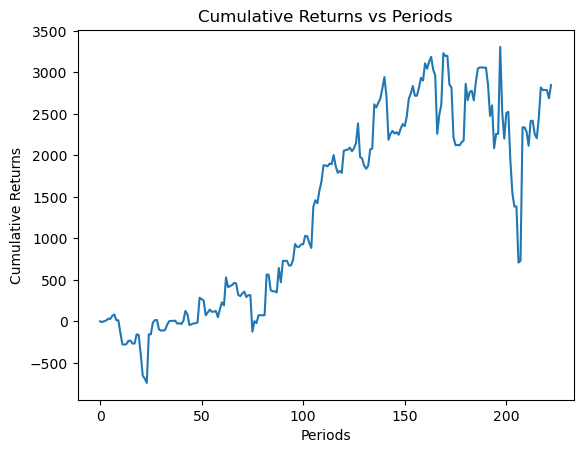

In [1041]:
cumulative_returns_1 = []
cumulative_returns_1.insert(0,0)
windows.insert(0,0)
s = 0
for i in returns :
    s = s + i
    cumulative_returns_1.append(s)


plt.plot(windows,cumulative_returns_1)
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.show()


# Strat-2 with variable exit in window + fixed exit at the end

In [1042]:
def get_returns2(groups,master_macd,master_rsi,prices,period) :
    returns = []
    num_trades = []
    temp = 0
    intrade = []
    tradesheet = pd.DataFrame(columns=['Date','Buy Stock','Sell Stock','Buy Price','Sell Price','Buy Quantity','Sell Quantity','Profit'])
    i = 0
    n = 0
    while i<len(prices):
        for group in groups:
            buy = 0
            buy_rsi = 100.0
            sell = 0
            sell_rsi = 0.0
            for j in range(1,len(prices.columns)):
                if(prices.columns[j] in group):
                    if(master_macd.iloc[i,j]==1):
                        if(master_rsi.iloc[i,j]<buy_rsi):
                            buy = j
                            buy_rsi = master_rsi.iloc[i,j]
                    elif(master_macd.iloc[i,j]==-1):
                        if(master_rsi.iloc[i,j]>sell_rsi):
                            sell = j
                            sell_rsi = master_rsi.iloc[i,j]
            
            if(buy!=0 and sell!=0):
                buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
                l = [i,buy,buy_quantity,sell]
                row = pd.DataFrame({'Date':prices.iloc[i,0],'Buy Stock':prices.columns[buy],'Sell Stock':prices.columns[sell],'Buy Price':prices.iloc[i,buy],'Sell Price':prices.iloc[i,sell],'Buy Quantity':buy_quantity,'Sell Quantity':float(1),'Profit':0},index=[0])
                tradesheet = pd.concat([tradesheet,row],ignore_index=True)
                intrade.append(l)
            
            elif(buy!=0):
                for trade in intrade:
                    if(trade[3]==buy):
                        b1 = prices.iloc[trade[0],trade[1]]
                        s1 = prices.iloc[trade[0],trade[3]]
                        b2 = prices.iloc[i,trade[1]]
                        s2 = prices.iloc[i,trade[3]]
                        r = (((b2-b1))*trade[2]) + ((s1-s2))
                        temp += r
                        row = pd.DataFrame({'Date':prices.iloc[i,0],'Buy Stock':prices.columns[trade[3]],'Sell Stock':prices.columns[trade[1]],'Buy Price':s2,'Sell Price':b2,'Buy Quantity':float(1),'Sell Quantity':trade[2],'Profit':r},index=[0])
                        tradesheet = pd.concat([tradesheet,row],ignore_index=True)
                        intrade.remove(trade)
                        n += 1


            elif(sell!=0):
                for trade in intrade:
                    if(trade[1]==sell):
                        b1 = prices.iloc[trade[0],trade[1]]
                        s1 = prices.iloc[trade[0],trade[3]]
                        b2 = prices.iloc[i,trade[1]]
                        s2 = prices.iloc[i,trade[3]]
                        r = (((b2-b1))*trade[2]) + ((s1-s2))
                        temp += r
                        row = pd.DataFrame({'Date':prices.iloc[i,0],'Buy Stock':prices.columns[trade[3]],'Sell Stock':prices.columns[trade[1]],'Buy Price':s2,'Sell Price':b2,'Buy Quantity':float(1),'Sell Quantity':trade[2],'Profit':r},index=[0])
                        tradesheet = pd.concat([tradesheet,row],ignore_index=True)
                        intrade.remove(trade)
                        n += 1 
        
        if((i+1)%period==0):
            for x in range(len(intrade)):
                b1 = prices.iloc[intrade[x][0],intrade[x][1]]
                s1 = prices.iloc[intrade[x][0],intrade[x][3]]
                b2 = prices.iloc[i,intrade[x][1]]
                s2 = prices.iloc[i,intrade[x][3]]
                r = (((b2-b1))*intrade[x][2]) + ((s1-s2))
                temp += r
                row = pd.DataFrame({'Date':prices.iloc[i,0],'Buy Stock':prices.columns[intrade[x][3]],'Sell Stock':prices.columns[intrade[x][1]],'Buy Price':s2,'Sell Price':b2,'Buy Quantity':float(1),'Sell Quantity':intrade[x][2],'Profit':r},index=[0])
                tradesheet = pd.concat([tradesheet,row],ignore_index=True)
                n += 1
            intrade = []
            returns.append(temp)
            num_trades.append(n)
            temp = 0
            n = 0

        i += 1

    return returns,num_trades, tradesheet

In [1043]:
returns,num_trades, tradesheet2 = get_returns2(groups,master_macd,master_rsi,prices,trading_window)

/var/folders/94/qzww3__j7w95pdc_5q59f29c0000gn/T/ipykernel_13018/3871633366.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tradesheet = pd.concat([tradesheet,row],ignore_index=True)


In [1044]:

windows = []
for i in range(len(returns)):
    windows.append(i+1)

tradesheet2.to_csv('/Users/hitengoel/Machine Learning/Pair Trading (ML:TI)/tradesheets/Sensex/With Clustering/Daily MACD+RSI Variable Sensex.csv',index=False)
tradesheet2

,Date,Buy Stock,Sell Stock,Buy Price,Sell Price,Buy Quantity,Sell Quantity,Profit
0,2011-01-27,APNT IB Equity,BHARTI IB Equity,260.03,293.49,1.128677,1.000000,0
1,2011-01-27,TTMT IB Equity,JSTL IB Equity,236.32,96.56,0.408599,1.000000,0
2,2011-01-31,MSIL IB Equity,NTPC IB Equity,1252.80,157.42,0.125655,1.000000,0
3,2011-01-31,JSTL IB Equity,TTMT IB Equity,90.59,227.21,1.000000,0.408599,2.247668
4,2011-02-02,NTPC IB Equity,MSIL IB Equity,150.25,1215.85,1.000000,0.125655,2.527065
...,...,...,...,...,...,...,...,...
1432,2022-11-30,KMB IB Equity,SUNP IB Equity,1945.60,1044.35,1.000000,1.883107,21.022622
1433,2022-11-30,HCLT IB Equity,BAF IB Equity,1120.75,6723.10,1.000000,0.165065,-11.00189
1434,2022-12-09,IIB IB Equity,UTCEM IB Equity,1202.05,7085.90,5.894846,1.000000,0
1435,2022-12-20,UTCEM IB Equity,IIB IB Equity,7090.25,1229.80,1.000000,5.894846,159.231985


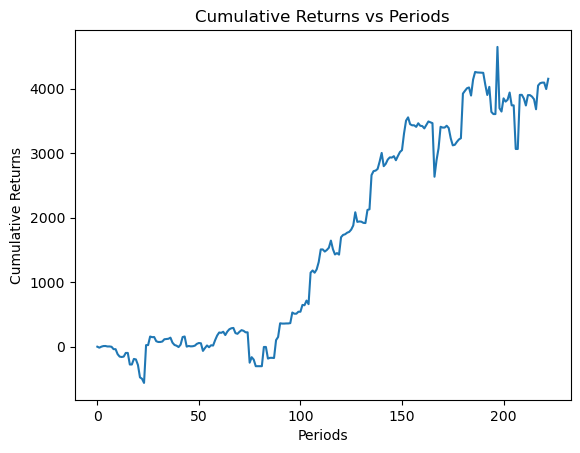

In [1045]:

cumulative_returns_2 = []
cumulative_returns_2.insert(0,0)
windows.insert(0,0)
s = 0
for i in returns :
    s = s + i
    cumulative_returns_2.append(s)


plt.plot(windows,cumulative_returns_2)
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.show()


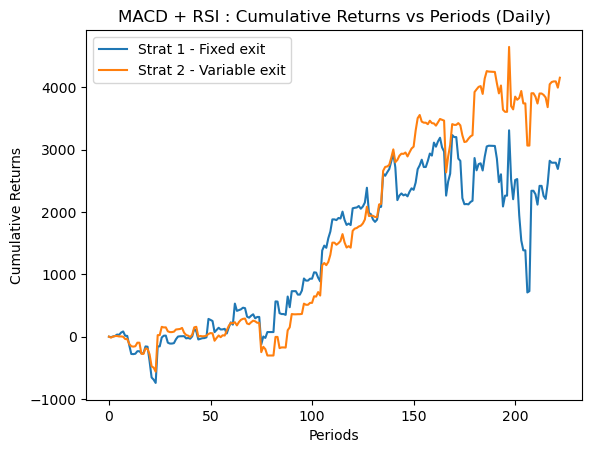

In [1046]:
plt.plot(windows,cumulative_returns_1,label = "Strat 1 - Fixed exit")
plt.plot(windows,cumulative_returns_2,label = "Strat 2 - Variable exit")
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('MACD + RSI : Cumulative Returns vs Periods (Daily)')
plt.legend()
plt.savefig('/Users/hitengoel/Machine Learning/Pair Trading (ML:TI)/Plots/Sensex With Clustering MACD+RSI Daily.png')
plt.show()

# strat 3 RSI Fixed exit

In [1047]:
def get_returns3(groups,master_rsi,prices,period) :
    returns = []
    num_trades = []
    temp = 0
    intrade = []
    tradesheet = pd.DataFrame(columns=['Date','Buy Stock','Sell Stock','Buy Price','Sell Price','Buy Quantity','Sell Quantity','Profit'])
    i = 0
    n = 0
    while i<len(prices):
        for group in groups:
            buy = 0
            buy_rsi = 100.0
            sell = 0
            sell_rsi = 0.0
            for j in range(1,len(prices.columns)):
                if(prices.columns[j] in group):
                    if(master_rsi.iloc[i,j]<30):
                        if(master_rsi.iloc[i,j]<buy_rsi):
                            buy = j
                            buy_rsi = master_rsi.iloc[i,j]
                    elif(master_rsi.iloc[i,j]>70):
                        if(master_rsi.iloc[i,j]>sell_rsi):
                            sell = j
                            sell_rsi = master_rsi.iloc[i,j]
            
            if(buy!=0 and sell!=0):
                buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
                l = [i,buy,buy_quantity,sell]
                row = pd.DataFrame({'Date':prices.iloc[i,0],'Buy Stock':prices.columns[buy],'Sell Stock':prices.columns[sell],'Buy Price':prices.iloc[i,buy],'Sell Price':prices.iloc[i,sell],'Buy Quantity':buy_quantity,'Sell Quantity':float(1),'Profit':0},index=[0])
                tradesheet = pd.concat([tradesheet,row],ignore_index=True)
                intrade.append(l)
        
        if((i+1)%period==0):
            for x in range(len(intrade)):
                b1 = prices.iloc[intrade[x][0],intrade[x][1]]
                s1 = prices.iloc[intrade[x][0],intrade[x][3]]
                b2 = prices.iloc[i,intrade[x][1]]
                s2 = prices.iloc[i,intrade[x][3]]
                r = (((b2-b1))*intrade[x][2]) + ((s1-s2))
                temp += r
                row = pd.DataFrame({'Date':prices.iloc[i,0],'Buy Stock':prices.columns[intrade[x][3]],'Sell Stock':prices.columns[intrade[x][1]],'Buy Price':s2,'Sell Price':b2,'Buy Quantity':float(1),'Sell Quantity':intrade[x][2],'Profit':r},index=[0])
                tradesheet = pd.concat([tradesheet,row],ignore_index=True)
                n+=1
            intrade = []
            returns.append(temp)
            temp = 0
            num_trades.append(n)
            n = 0

        i += 1

    return returns,num_trades, tradesheet

In [1048]:
returns,num_trades, tradesheet3 = get_returns3(groups,master_rsi,prices,trading_window)

/var/folders/94/qzww3__j7w95pdc_5q59f29c0000gn/T/ipykernel_13018/2614391882.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tradesheet = pd.concat([tradesheet,row],ignore_index=True)


In [1049]:

windows = []
for i in range(len(returns)):
    windows.append(i+1)

tradesheet3.to_csv('/Users/hitengoel/Machine Learning/Pair Trading (ML:TI)/tradesheets/Sensex/With Clustering/Daily RSI Fixed Sensex.csv',index=False)
tradesheet3

,Date,Buy Stock,Sell Stock,Buy Price,Sell Price,Buy Quantity,Sell Quantity,Profit
0,2011-08-10,WPRO IB Equity,MSIL IB Equity,119.08,1279.70,10.746557,1.000000,0
1,2011-08-24,MSIL IB Equity,WPRO IB Equity,1115.15,110.25,1.000000,10.746557,69.657902
2,2012-07-11,WPRO IB Equity,ICICIBC IB Equity,125.15,170.35,1.361167,1.000000,0
3,2012-07-23,ICICIBC IB Equity,WPRO IB Equity,165.90,119.22,1.000000,1.361167,-3.621718
4,2012-07-25,KMB IB Equity,BAF IB Equity,269.55,103.92,0.385531,1.000000,0
...,...,...,...,...,...,...,...,...
595,2022-07-15,MM IB Equity,HCLT IB Equity,1173.10,883.10,1.000000,1.328389,0.0
596,2022-11-21,BAF IB Equity,HCLT IB Equity,6680.75,1095.85,0.164031,1.000000,0
597,2022-11-22,BAF IB Equity,HCLT IB Equity,6685.35,1103.80,0.165107,1.000000,0
598,2022-11-30,HCLT IB Equity,BAF IB Equity,1120.75,6723.10,1.000000,0.164031,-17.953288


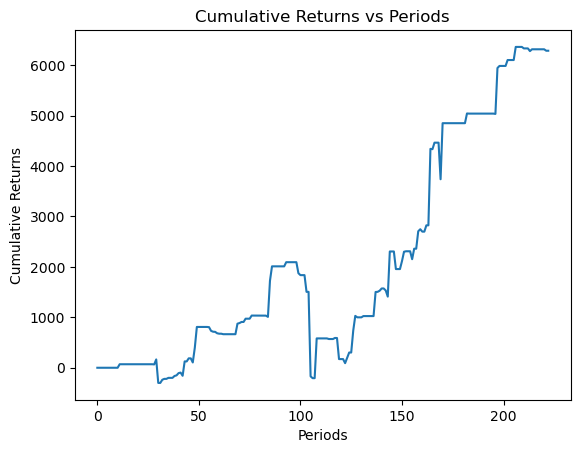

In [1050]:
cumulative_returns_3 = []
cumulative_returns_3.insert(0,0)
windows.insert(0,0)
s = 0
for i in returns :
    s = s + i
    cumulative_returns_3.append(s)


plt.plot(windows,cumulative_returns_3)
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.show()

# strat 4 RSI variable exit

In [1051]:
def get_returns4(groups,master_rsi,prices,period) :
    returns = []
    num_trades = []
    temp = 0
    intrade = []
    tradesheet = pd.DataFrame(columns=['Date','Buy Stock','Sell Stock','Buy Price','Sell Price','Buy Quantity','Sell Quantity','Profit'])
    i = 0
    n = 0
    while i<len(prices):
        for group in groups:
            buy = 0
            buy_rsi = 100.0
            sell = 0
            sell_rsi = 0.0
            for j in range(1,len(prices.columns)):
                if(prices.columns[j] in group):
                    if(master_rsi.iloc[i,j]<30):
                        if(master_rsi.iloc[i,j]<buy_rsi):
                            buy = j
                            buy_rsi = master_rsi.iloc[i,j]
                    elif(master_rsi.iloc[i,j]>70):
                        if(master_rsi.iloc[i,j]>sell_rsi):
                            sell = j
                            sell_rsi = master_rsi.iloc[i,j]
            
            if(buy!=0 and sell!=0):
                buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
                l = [i,buy,buy_quantity,sell]
                row = pd.DataFrame({'Date':prices.iloc[i,0],'Buy Stock':prices.columns[buy],'Sell Stock':prices.columns[sell],'Buy Price':prices.iloc[i,buy],'Sell Price':prices.iloc[i,sell],'Buy Quantity':buy_quantity,'Sell Quantity':float(1),'Profit':0},index=[0])
                tradesheet = pd.concat([tradesheet,row],ignore_index=True)
                intrade.append(l)

            elif(buy!=0):
                for trade in intrade:
                    if(trade[3]==buy):
                        b1 = prices.iloc[trade[0],trade[1]]
                        s1 = prices.iloc[trade[0],trade[3]]
                        b2 = prices.iloc[i,trade[1]]
                        s2 = prices.iloc[i,trade[3]]
                        r = (((b2-b1))*trade[2]) + ((s1-s2))
                        temp += r
                        row = pd.DataFrame({'Date':prices.iloc[i,0],'Buy Stock':prices.columns[trade[3]],'Sell Stock':prices.columns[trade[1]],'Buy Price':s2,'Sell Price':b2,'Buy Quantity':float(1),'Sell Quantity':trade[2],'Profit':r},index=[0])
                        tradesheet = pd.concat([tradesheet,row],ignore_index=True)
                        intrade.remove(trade)
                        n += 1


            elif(sell!=0):
                for trade in intrade:
                    if(trade[1]==sell):
                        b1 = prices.iloc[trade[0],trade[1]]
                        s1 = prices.iloc[trade[0],trade[3]]
                        b2 = prices.iloc[i,trade[1]]
                        s2 = prices.iloc[i,trade[3]]
                        r = (((b2-b1))*trade[2]) + ((s1-s2))
                        temp += r
                        row = pd.DataFrame({'Date':prices.iloc[i,0],'Buy Stock':prices.columns[trade[3]],'Sell Stock':prices.columns[trade[1]],'Buy Price':s2,'Sell Price':b2,'Buy Quantity':float(1),'Sell Quantity':trade[2],'Profit':r},index=[0])
                        tradesheet = pd.concat([tradesheet,row],ignore_index=True)
                        intrade.remove(trade)
                        n += 1
        
        if((i+1)%period==0):
            for x in range(len(intrade)):
                b1 = prices.iloc[intrade[x][0],intrade[x][1]]
                s1 = prices.iloc[intrade[x][0],intrade[x][3]]
                b2 = prices.iloc[i,intrade[x][1]]
                s2 = prices.iloc[i,intrade[x][3]]
                r = (((b2-b1))*intrade[x][2]) + ((s1-s2))
                temp += r
                row = pd.DataFrame({'Date':prices.iloc[i,0],'Buy Stock':prices.columns[intrade[x][3]],'Sell Stock':prices.columns[intrade[x][1]],'Buy Price':s2,'Sell Price':b2,'Buy Quantity':float(1),'Sell Quantity':intrade[x][2],'Profit':r},index=[0])
                tradesheet = pd.concat([tradesheet,row],ignore_index=True)
                n+=1
            intrade = []
            returns.append(temp)
            temp = 0
            num_trades.append(n)
            n = 0

        i += 1

    return returns,num_trades, tradesheet

In [1052]:
returns,num_trades, tradesheet4 = get_returns4(groups,master_rsi,prices,trading_window)

/var/folders/94/qzww3__j7w95pdc_5q59f29c0000gn/T/ipykernel_13018/547718037.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tradesheet = pd.concat([tradesheet,row],ignore_index=True)


In [1053]:

windows = []
for i in range(len(returns)):
    windows.append(i+1)

tradesheet4.to_csv('/Users/hitengoel/Machine Learning/Pair Trading (ML:TI)/tradesheets/Sensex/With Clustering/Daily RSI Variable Sensex.csv',index=False)   
tradesheet4

,Date,Buy Stock,Sell Stock,Buy Price,Sell Price,Buy Quantity,Sell Quantity,Profit
0,2011-08-10,WPRO IB Equity,MSIL IB Equity,119.08,1279.70,10.746557,1.000000,0
1,2011-08-24,MSIL IB Equity,WPRO IB Equity,1115.15,110.25,1.000000,10.746557,69.657902
2,2012-07-11,WPRO IB Equity,ICICIBC IB Equity,125.15,170.35,1.361167,1.000000,0
3,2012-07-23,ICICIBC IB Equity,WPRO IB Equity,165.90,119.22,1.000000,1.361167,-3.621718
4,2012-07-25,KMB IB Equity,BAF IB Equity,269.55,103.92,0.385531,1.000000,0
...,...,...,...,...,...,...,...,...
595,2022-07-15,MM IB Equity,HCLT IB Equity,1173.10,883.10,1.000000,1.328389,0.0
596,2022-11-21,BAF IB Equity,HCLT IB Equity,6680.75,1095.85,0.164031,1.000000,0
597,2022-11-22,BAF IB Equity,HCLT IB Equity,6685.35,1103.80,0.165107,1.000000,0
598,2022-11-30,HCLT IB Equity,BAF IB Equity,1120.75,6723.10,1.000000,0.164031,-17.953288


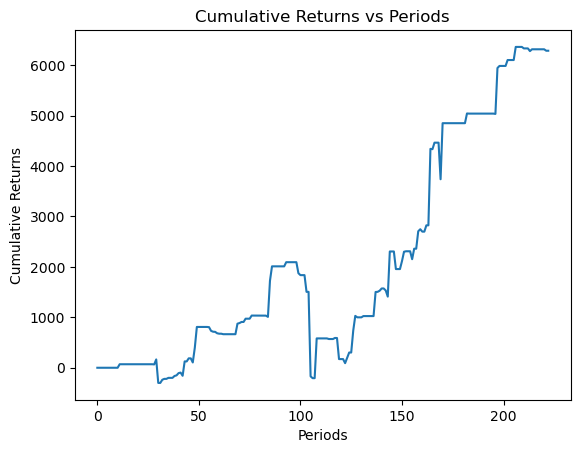

In [1054]:
cumulative_returns_4 = []
cumulative_returns_4.insert(0,0)
windows.insert(0,0)
s = 0
for i in returns :
    s = s + i
    cumulative_returns_4.append(s)


plt.plot(windows,cumulative_returns_4)
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.show()

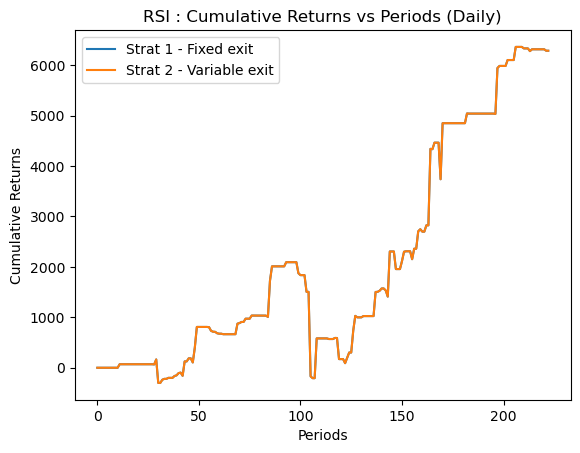

In [1055]:
plt.plot(windows,cumulative_returns_3,label = "Strat 1 - Fixed exit")
plt.plot(windows,cumulative_returns_4,label = "Strat 2 - Variable exit")
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('RSI : Cumulative Returns vs Periods (Daily)')
plt.legend()
plt.savefig('/Users/hitengoel/Machine Learning/Pair Trading (ML:TI)/Plots/Sensex With Clustering RSI Daily.png')
plt.show()
